# Najboljša piva na strani Ratebeer

V projektni nalogi sem zajela podatke s prvih 100 strani na seznamu največkrat ocenjenih piv na spletni strani [Ratebeer](https://www.ratebeer.com/beer-ratings/).

## Zajeti podatki:
- ime piva
- spletni naslov
- ocena (od 0 do 5)
- pivovarna
- mesto
- država
- stil
- alkohol (v procentih)
- kozarec

V nadaljevanju bom obravnavala odvisnost kakovosti piva od države in stila, povprečno vsebnost akohola za državo, število pivovarn po državi, povprečna vsebnost alkohola glede na kozarec, itd.

In [2]:
import pandas as pd
%matplotlib inline

In [3]:
imena = pd.read_csv('imena.csv')
pivo = pd.read_csv('pivo.csv')
kozarci = pd.read_csv('kozarci.csv')

pd.options.display.max_rows = 14
pd.set_option('display.mpl_style', 'default')

c:\users\anja\appdata\local\programs\python\python35\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


Oglejmo si tabele:

In [4]:
imena.head(10)

,ime,naslov
0,Buxton Extra Porter,/buxton-extra-porter/409056/
1,Prairie Coffee Okie,/prairie-coffee-okie/382217/
2,Oskar Blues Hotbox Coffee Porter,/oskar-blues-hotbox-coffee-porter/132098/
3,Three Floyds Wigsplitter,/three-floyds-wigsplitter/342218/
4,Stillwater Gose Gone Wild,/stillwater-gose-gone-wild/266266/
5,Founders KBS (Kentucky Breakfast Stout),/founders-kbs-kentucky-breakfast-stout/40544/
6,Cigar City White Oak Jai Alai India Pale Ale,/cigar-city-white-oak-jai-alai-india-pale-ale/...
7,Hoppin' Frog Rum Barrel Aged Silk Porter,/hoppin-frog-rum-barrel-aged-silk-porter/323062/
8,Superstition Aphrodisia Pyment - Cabernet/Pino...,/superstition-aphrodisia-pyment--cabernet-pino...
9,Dogfish Head 60 Minute IPA,/dogfish-head-60-minute-ipa/7431/


In [5]:
pivo.head(10)

,naslov,ocena,pivovarna,mesto,drzava,stil,alkohol
0,/arrogant-bastard-ale/1315/,3.89,Stone Brewing,Escondido,USA,American Strong Ale,7.2
1,/pipeworks-lil-citra/392754/,3.65,Pipeworks Brewing Company,Chicago,USA,Session IPA,4.9
2,/buxton--omnipollo-lemon-meringue-ice-cream-pi...,3.68,Buxton,NaN,England,Fruit Beer,6.0
3,/founders-breakfast-stout/14956/,4.15,Founders Brewing Company,Grand Rapids,USA,Imperial Stout,8.3
4,/trillium--amager-sigtebrod/454740/,3.85,Trillium Brewing Company,Boston,USA,India Pale Ale (IPA),6.8
5,/crouch-vale-amarillo/24922/,3.60,Crouch Vale,NaN,England,Golden Ale/Blond Ale,5.0
6,/victory-cage-radler/351429/,2.97,Victory Brewing Company (ABV),Downingtown,USA,Radler/Shandy,3.0
7,/rodenbach-alexander/1195/,4.15,Brouwerij Rodenbach (Palm),NaN,Belgium,Sour Red/Brown,6.0
8,/oskar-blues-hotbox-coffee-porter/132098/,3.68,Oskar Blues Brewery,Longmont,USA,Porter,6.5
9,/schneider-weisse-tap-x-mathilda-soleil/319360/,3.72,Schneider Weisse G. Schneider & Sohn GmbH,NaN,Germany,Weizen Bock,7.0


In [6]:
kozarci.head(10)

,naslov,kozarec
0,/arrogant-bastard-ale/1315/,Snifter
1,/arrogant-bastard-ale/1315/,Tulip
2,/pipeworks-lil-citra/392754/,English pint
3,/pipeworks-lil-citra/392754/,Shaker
4,/pipeworks-lil-citra/392754/,Stem glass
5,/pipeworks-lil-citra/392754/,Tumbler
6,/buxton--omnipollo-lemon-meringue-ice-cream-pi...,Flute
7,/buxton--omnipollo-lemon-meringue-ice-cream-pi...,Shaker
8,/founders-breakfast-stout/14956/,Snifter
9,/trillium--amager-sigtebrod/454740/,Shaker


Tabeli _pivo_ bom dodala **imena** in razvrstila piva po ocenah.

In [7]:
tabela = pd.merge(imena, pivo)[['ime', 'ocena', 'pivovarna', 'mesto', 'drzava', 'stil', 'alkohol']]
tabela

,ime,ocena,pivovarna,mesto,drzava,stil,alkohol
0,Buxton Extra Porter,3.89,Buxton,NaN,England,Porter,7.40
1,Prairie Coffee Okie,3.91,Krebs Brewing Company / Pete's Place / Choc Beer,Tulsa,USA,American Strong Ale,13.00
2,Oskar Blues Hotbox Coffee Porter,3.68,Oskar Blues Brewery,Longmont,USA,Porter,6.50
3,Three Floyds Wigsplitter,3.87,Three Floyds Brewing Company,Munster,USA,Sweet Stout,7.70
4,Stillwater Gose Gone Wild,3.96,Crazy Mountain Brewing Company,Baltimore,USA,Grodziskie/Gose/Lichtenhainer,4.30
5,Founders KBS (Kentucky Breakfast Stout),4.28,Founders Brewing Company,Grand Rapids,USA,Imperial Stout,11.20
6,Cigar City White Oak Jai Alai India Pale Ale,3.86,Cigar City Brewing,Tampa,USA,India Pale Ale (IPA),7.50
...,...,...,...,...,...,...,...
655,Crooked Stave Nightmare on Brett (Raspberry),4.04,Crooked Stave,Denver,USA,Sour/Wild Ale,9.67
656,Epic Utah Sage Saison,3.60,Epic Brewing Company (UT/CO),Salt Lake City,USA,Spice/Herb/Vegetable,7.50


In [8]:
tabela[['ime', 'ocena']].sort_values('ocena')

,ime,ocena
438,Heineken H41,2.92
565,Roslyn Brookside Pale Lager,2.92
605,Narragansett Del's Shandy,2.98
385,Stiegl Radler Grapefruit,3.05
403,Parallel 49 Tricycle Radler - Grapefruit,3.06
183,Flying Dog Heat Series: Ancho Lime Paradise Lager,3.16
175,Anchor California Lager,3.20
...,...,...
163,Schramm's Madeline,4.29
564,Superstition Endovelicus,4.32


Lestvica po eni strani ne preseneča, saj se je na vrhu pojavil Westvleteren 12, zagotovo pa Heineken ni najslabše pivo, vendar smo le zajeli premalo podatkov. Kot primer, [Lasko](http://www.ratebeer.com/beer/lasko-zlatorog/16478/) ima oceno 2.35 in se s svojimi 417 ocenami ni uvrstil na naš seznam.

Poglejmo, iz kolikih različnih držav zajeta piva prihajajo in kolikšen je povprečni odstotek alkohola v posamezni državi.

In [9]:
tabela.groupby('drzava').size().sort_values(ascending=False)

drzava
USA            481
England         69
Canada          41
Germany         40
Belgium         23
Italy            3
Netherlands      2
Republic         1
France           1
Austria          1
dtype: int64

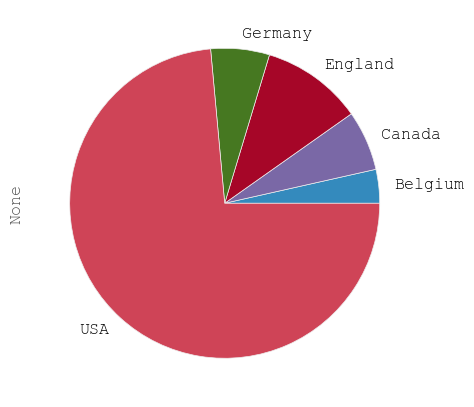

In [22]:
tabela.groupby('drzava').size()[tabela.groupby('drzava').size()>3].plot(kind='pie', figsize=(5, 5), fontsize=12)

In [10]:
tabela.groupby('drzava')[['alkohol']].mean().sort_values('alkohol', ascending=False)

,alkohol
drzava,
Italy,10.333333
Belgium,9.026087
USA,7.857300
France,7.000000
Canada,6.924390
Germany,6.457500
England,5.897101
Netherlands,5.650000
Republic,4.500000


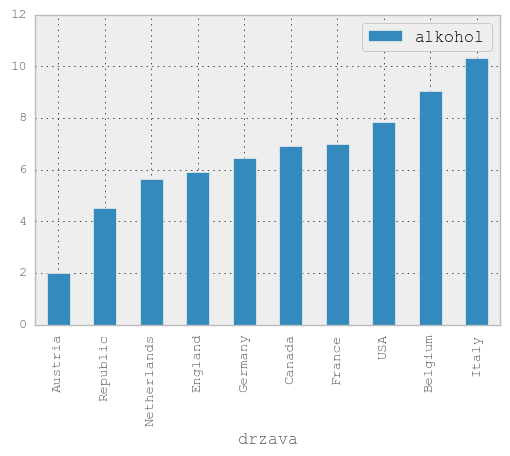

In [11]:
tabela.groupby('drzava')[['alkohol']].mean().sort_values('alkohol').plot(kind='bar')

Očitno je na strani največ ameriških uporabnikov, zato je večina piv, ki so največkrat ocenjena, ravno iz Amerike. Zanimivo je tudi, da je povprečje vsebnosti alkohola v Avstriji tako nizko. Poglejmo, zakaj:

In [12]:
tabela[tabela['drzava'] == 'Austria'][['ime', 'ocena', 'drzava', 'stil', 'alkohol']]

,ime,ocena,drzava,stil,alkohol
385,Stiegl Radler Grapefruit,3.05,Austria,Radler/Shandy,2.0


Vidimo, da smo zajeli le eno pivo iz Avstrije in sicer radler. :D

Poglejmo si še povprečje vsebnosti alkohola ostalih stilov in povprečno oceno posameznega stila.

In [13]:
tabela.groupby('stil').mean().sort_values('alkohol', ascending=False)[['alkohol']]

,alkohol
stil,
Sak\xc3\xa9 - Genshu,18.000000
Old Ale,16.800000
Mead,13.666667
Barley Wine,11.730000
Imperial Stout,11.715789
American Strong Ale,11.705263
Scotch Ale,11.600000
...,...
Session IPA,4.781250


In [14]:
tabela.groupby('stil').mean().sort_values('ocena', ascending=False)[['ocena']]

,ocena
stil,
Lambic Style - Gueuze,4.250000
Imperial Stout,4.175128
Mead,4.162500
Abt/Quadrupel,4.100000
Imperial Porter,4.062000
Sour Red/Brown,4.048571
Baltic Porter,4.040000
...,...
Bitter,3.452000


Poglejmo, kateri stili so v posameznih državah najbolj priljubljeni.

In [15]:
tabela.groupby(['drzava', 'stil']).size().sort_values(ascending=False)

drzava   stil                
USA      India Pale Ale (IPA)    61
         Imperial IPA            48
         Imperial Stout          38
         American Pale Ale       37
         Spice/Herb/Vegetable    24
         American Strong Ale     19
         Saison                  18
                                 ..
Germany  Dunkler Bock             1
         Altbier                  1
France   Cider                    1
England  Sweet Stout              1
         Mild Ale                 1
         K\xc3\xb6lsch            1
Austria  Radler/Shandy            1
dtype: int64

Ta tabela poda dobro oceno za ZDA, za ostale države pa imamo premalo podatkov, da bi sklepali karkoli iz tega.


Poglejmo si še, kako so povprečne ocene ter alkohol odvisni od pivovarne:

In [35]:
tabela.groupby('pivovarna')[['ocena', 'alkohol']].mean().sort_values('ocena', ascending=False)

,ocena,alkohol
pivovarna,,
Westvleteren Abdij St. Sixtus,4.320000,9.100000
Schramm's Mead,4.211667,13.833333
Cycle Brewing,4.180000,11.000000
Kuhnhenn Brewing,4.170000,15.500000
Hair of the Dog Brewing Company,4.155000,11.250000
Funky Buddha Brewery,4.115000,8.200000
Brouwerij Rodenbach (Palm),4.115000,6.500000
...,...,...
Payette Brewing Company,3.220000,4.800000


In [44]:
#pivovarne = tabela.groupby(['pivovarna', 'stil']).size().unstack()

In [46]:
#pivovarne0 = pd.DataFrame(pivovarne.isnull().sum(axis=1))
#pivovarne0.columns = ['število']


In [60]:
#stil = pd.DataFrame(tabela.groupby('stil').size().reset_index())
#stil.shape[0]


In [59]:
#pivovarne0[0] = mesta.shape[ 0 ] - pivovarne0['število']
#pivovarne1 = pd.DataFrame(pivovarne.sort_values('0'))
#pivovarne1.columns = ['št. pivovarn za stil']
#pivovarne1.sort_values('št. pivovarn za stil', ascending=False)

Oglejmo si še tabelo _kozarci_. Najprej bom preštela, kolikokrat se pojavi posamezna vrsta kozarca v tabeli. Več o tipih kozarcev najdete na tej [povezavi](http://www.truebeer.com/Beer-Glass-Types_ep_22-1.html).

In [66]:
kozarci.groupby('kozarec').size().sort_values(ascending=False)

kozarec
Shaker                     352
Tulip                      236
Snifter                    189
Lager glass                122
English pint               118
Tumbler                     90
Dimpled mug                 86
                          ... 
Bowl                        12
K\\xc3\\xb6lsch/Altbier      5
Yard                         2
Thistle                      2
Guinomi                      1
Masu                         1
Ochoko                       1
dtype: int64

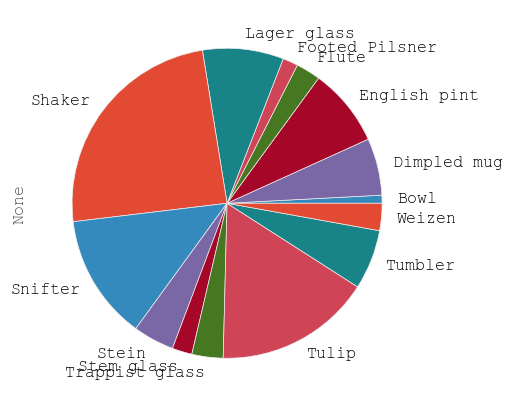

In [78]:
kozarci.groupby('kozarec').size()[kozarci.groupby('kozarec').size()>5].plot(kind='pie', figsize=(5, 5), fontsize=12)

Za boljšo predstavo pridružimo osnovni tabeli stolpec kozarci in si oglejmo, kako je izbor kozarca povezan z vsebnostjo alkohola in oceno pijače.

In [94]:
tabela0 = pd.merge(kozarci, imena, on='naslov')
tabela1 = pd.merge(tabela0, pivo, on='naslov')[['ime', 'ocena', 'pivovarna', 'mesto', 'drzava', 'stil', 'alkohol', 'kozarec']]
tabela1

,ime,ocena,pivovarna,mesto,drzava,stil,alkohol,kozarec
0,Arrogant Bastard Ale,3.89,Stone Brewing,Escondido,USA,American Strong Ale,7.2,Snifter
1,Arrogant Bastard Ale,3.89,Stone Brewing,Escondido,USA,American Strong Ale,7.2,Tulip
2,Pipeworks Lil Citra,3.65,Pipeworks Brewing Company,Chicago,USA,Session IPA,4.9,English pint
3,Pipeworks Lil Citra,3.65,Pipeworks Brewing Company,Chicago,USA,Session IPA,4.9,Shaker
4,Pipeworks Lil Citra,3.65,Pipeworks Brewing Company,Chicago,USA,Session IPA,4.9,Stem glass
5,Pipeworks Lil Citra,3.65,Pipeworks Brewing Company,Chicago,USA,Session IPA,4.9,Tumbler
6,Buxton / Omnipollo Lemon Meringue Ice Cream Pie,3.68,Buxton,NaN,England,Fruit Beer,6.0,Flute
...,...,...,...,...,...,...,...,...
1419,Three Floyds Amber Smashed Face,3.82,Three Floyds Brewing Company,Munster,USA,Amber Ale,7.0,Shaker
1420,AleSmith Grand Cru,3.85,AleSmith Brewing Company,San Diego,USA,Belgian Strong Ale,10.0,Trappist glass


In [101]:
tabela1.groupby('kozarec').mean().sort_values('ocena', ascending=False)

,ocena,alkohol
kozarec,,
Snifter,4.030378,10.024918
Thistle,3.935000,11.600000
Stem glass,3.928000,9.255000
Yard,3.880000,8.000000
Tulip,3.870086,7.439956
Trappist glass,3.814130,8.393478
Tumbler,3.795814,7.848953
...,...,...
Weizen,3.625128,6.005128


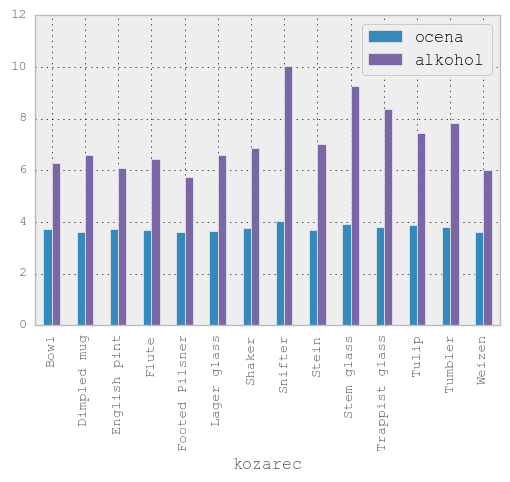

In [121]:
tabela1.groupby('kozarec').mean()[kozarci.groupby('kozarec').size()>5].plot(kind='bar')


